In [420]:
import pandas as pd
import pycountry
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from country_list import countries_for_language
from sklearn.cluster import KMeans
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler

In [421]:
pd.set_option('display.max_rows', None)

In [422]:
gdp_raw = pd.read_excel(f'../Demographic Data/GDP by country.xls', skiprows=3)
gdp_raw.drop(gdp_raw.iloc[:,2:44].columns, axis=1, inplace=True)
gdp_raw.drop(gdp_raw.iloc[:,-1:].columns,axis=1, inplace=True)
gdp = pd.melt(gdp_raw, id_vars=['Country Name', 'Country Code'], value_vars=gdp_raw.iloc[:,2:].columns, var_name='year', value_name='gdp')
gdp.sort_values(by=['Country Name', 'year'], inplace=True)
gdp.reset_index(inplace=True)
gdp.drop(['index'], axis=1, inplace=True)

In [423]:
exp_on_education_raw = pd.read_excel(f'../Demographic Data/Govt Exp on Education.xls', skiprows=3)
exp_on_education_raw.drop(exp_on_education_raw.iloc[:,2:44].columns, axis=1, inplace=True)
exp_on_education_raw
exp_on_education_raw.drop(exp_on_education_raw.iloc[:,-1:].columns,axis=1, inplace=True)
exp_on_education = pd.melt(exp_on_education_raw, id_vars=['Country Name', 'Country Code'], value_vars=exp_on_education_raw.iloc[:,2:].columns, var_name='year', value_name='govt_exp_ter_edu')
exp_on_education.sort_values(by=['Country Name', 'year'], inplace=True)
exp_on_education.reset_index(inplace=True)
exp_on_education.drop(['index'], axis=1, inplace=True)

In [424]:
literacy_rate_raw = pd.read_excel(f'../Demographic Data/Literacy Rate.xls', skiprows=3)
literacy_rate_raw.drop(literacy_rate_raw.iloc[:,2:44].columns, axis=1, inplace=True)
literacy_rate_raw.drop(literacy_rate_raw.iloc[:,-1:].columns,axis=1, inplace=True)
literacy_rate = pd.melt(literacy_rate_raw, id_vars=['Country Name', 'Country Code'], value_vars=literacy_rate_raw.iloc[:,2:].columns, var_name='year', value_name='literacy_rate')
literacy_rate.sort_values(by=['Country Name', 'year'], inplace=True)
literacy_rate.reset_index(inplace=True)
literacy_rate.drop(['index'], axis=1, inplace=True)

In [425]:
total_govt_exp_raw = pd.read_excel(f'../Demographic Data/Total Govt Exp on Education.xls', skiprows=3)
total_govt_exp_raw.drop(total_govt_exp_raw.iloc[:,2:44].columns, axis=1, inplace=True)
total_govt_exp_raw.drop(total_govt_exp_raw.iloc[:,-1:].columns,axis=1, inplace=True)
total_govt_exp = pd.melt(total_govt_exp_raw, id_vars=['Country Name', 'Country Code'], value_vars=total_govt_exp_raw.iloc[:,2:].columns, var_name='year', value_name='govt_exp_total')
total_govt_exp.sort_values(by=['Country Name', 'year'], inplace=True)
total_govt_exp.reset_index(inplace=True)
total_govt_exp.drop(['index'], axis=1, inplace=True)

In [426]:
avg_class_size_raw = pd.read_excel(f'../Demographic Data/Average Class Size.xls', skiprows=3)
avg_class_size_raw.drop(avg_class_size_raw.iloc[:,2:44].columns, axis=1, inplace=True)
avg_class_size_raw.drop(avg_class_size_raw.iloc[:,-1:].columns,axis=1, inplace=True)
avg_class_size = pd.melt(avg_class_size_raw, id_vars=['Country Name', 'Country Code'], value_vars=avg_class_size_raw.iloc[:,2:].columns, var_name='year', value_name='avg_class_size')
avg_class_size.sort_values(by=['Country Name', 'year'], inplace=True)
avg_class_size.reset_index(inplace=True)
avg_class_size.drop(['index'], axis=1, inplace=True)

In [427]:
enrollment_rate_raw = pd.read_excel(f'../Demographic Data/Enrollment.xls', skiprows=3)
enrollment_rate_raw.drop(enrollment_rate_raw.iloc[:,2:44].columns, axis=1, inplace=True)
enrollment_rate_raw.drop(enrollment_rate_raw.iloc[:,-1:].columns,axis=1, inplace=True)
enrollment_rate = pd.melt(enrollment_rate_raw, id_vars=['Country Name', 'Country Code'], value_vars=enrollment_rate_raw.iloc[:,2:].columns, var_name='year', value_name='enrollment_rate')
enrollment_rate.sort_values(by=['Country Name', 'year'], inplace=True)
enrollment_rate.reset_index(inplace=True)
enrollment_rate.drop(['index'], axis=1, inplace=True)

In [428]:
gdp_per_capita = pd.read_excel(f'../Demographic Data/GDP_per_capita.xls', skiprows=3)
gdp_per_capita.drop(gdp_per_capita.iloc[:,2:44].columns, axis=1, inplace=True)
gdp_per_capita.drop(gdp_per_capita.iloc[:,-1:].columns,axis=1, inplace=True)
gdp_per_capita = pd.melt(gdp_per_capita, id_vars=['Country Name','Country Code'], value_vars=gdp_per_capita.iloc[:,2:].columns, var_name='year', value_name='gdp_per_capita')
gdp_per_capita.sort_values(by=['Country Name', 'year'], inplace=True)
gdp_per_capita.reset_index(inplace=True)
gdp_per_capita.drop(['index'], axis=1, inplace=True)

In [429]:
govt_exp_student = pd.read_excel(f'../Demographic Data/gov_spend_per_student2.xls', skiprows=3)
govt_exp_student.drop(govt_exp_student.iloc[:,2:44].columns, axis=1, inplace=True)
govt_exp_student.drop(govt_exp_student.iloc[:,-1:].columns,axis=1, inplace=True)
govt_exp_student = pd.melt(govt_exp_student, id_vars=['Country Name','Country Code'], value_vars=govt_exp_student.iloc[:,2:].columns, var_name='year', value_name='govt_exp_per_student')
govt_exp_student.sort_values(by=['Country Name', 'year'], inplace=True)
govt_exp_student.reset_index(inplace=True)
govt_exp_student.drop(['index'], axis=1, inplace=True)

In [430]:
tert_grad_rate = pd.read_csv(f'../Demographic Data/tert_grad_rate.csv')
tert_grad_rate.sort_values(['LOCATION', 'TIME'], inplace=True)
tert_grad_rate.reset_index(inplace=True)
tert_grad_rate.drop(['index'], axis=1, inplace=True)
tert_grad_rate = tert_grad_rate[['LOCATION','TIME','Value']]
tert_grad_rate = tert_grad_rate.groupby(by=['LOCATION','TIME']).mean()

In [431]:
sec_grad_rate = pd.read_csv(f'../Demographic Data/sec_grad_rate.csv')
sec_grad_rate.sort_values(['LOCATION', 'TIME'], inplace=True)
sec_grad_rate.reset_index(inplace=True)
sec_grad_rate.drop(['index'], axis=1, inplace=True)
sec_grad_rate = sec_grad_rate[['LOCATION','TIME','Value']]
sec_grad_rate = sec_grad_rate.groupby(by=['LOCATION','TIME']).mean()

In [432]:
int_mobility = pd.read_csv(f'../Demographic Data/int_mobility.csv')
int_mobility = int_mobility[['LOCATION','TIME','Value']]

In [433]:
raw_demographics = [gdp, gdp_per_capita, exp_on_education, literacy_rate,total_govt_exp,avg_class_size,enrollment_rate, govt_exp_student]
raw_demographics_2 = [tert_grad_rate, sec_grad_rate, int_mobility]

In [434]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [435]:
cols_to_use = gdp_per_capita.columns.difference(gdp.columns)
df_final = pd.merge(gdp, gdp_per_capita[cols_to_use], left_index=True, right_index=True, how='outer')

for i in range(len(raw_demographics)):
    cols_to_use = raw_demographics[i].columns.difference(df_final.columns)
    df_final = pd.merge(df_final, raw_demographics[i][cols_to_use], left_index = True, right_index=True, how='outer')
    
df_final['year'] = df_final['year'].astype('int')

for i in range(len(raw_demographics_2)):
    df_final = df_final.merge(raw_demographics_2[i], left_on = ['Country Code', 'year'], right_on=['LOCATION', 'TIME'], how='outer') 
    df_final.rename(columns={'Value': get_df_name(raw_demographics_2[i])}, inplace=True)

df_final.drop(columns=['LOCATION', 'TIME'], axis=1, inplace=True)
df_final.rename(columns={'Country Name': 'country', 'Country Code': 'country_code'}, inplace=True)
df_final = df_final[['country',
      'country_code',
      'year',
      'gdp',
      'gdp_per_capita',
      'govt_exp_total',
      'govt_exp_ter_edu',
      'govt_exp_per_student',
      'avg_class_size',
      'literacy_rate',
      'sec_grad_rate',
      'tert_grad_rate',
      'enrollment_rate',
      'int_mobility'
     ]]
df_final.dropna(subset=['country', 'country_code'], inplace=True)

In [436]:
display(df_final.head())

country country_code    year           gdp  gdp_per_capita  \
0  Afghanistan          AFG  2000.0           NaN             NaN   
1  Afghanistan          AFG  2001.0           NaN             NaN   
2  Afghanistan          AFG  2002.0  4.055180e+09      179.426611   
3  Afghanistan          AFG  2003.0  4.515559e+09      190.683814   
4  Afghanistan          AFG  2004.0  5.226779e+09      211.382117   

   govt_exp_total  govt_exp_ter_edu  govt_exp_per_student  avg_class_size  \
0             NaN               NaN                   NaN             NaN   
1             NaN               NaN                   NaN             NaN   
2             NaN               NaN                   NaN             NaN   
3             NaN               NaN                   NaN        15.52784   
4             NaN               NaN                   NaN        15.52386   

   literacy_rate  sec_grad_rate  tert_grad_rate  enrollment_rate  int_mobility  
0            NaN            NaN             NaN              NaN           NaN  
1            NaN            NaN             NaN              NaN           NaN  
2            NaN            NaN             NaN              NaN           NaN  
3            NaN            NaN             NaN          1.20234           NaN  
4            NaN            NaN             NaN          1.19937           NaN

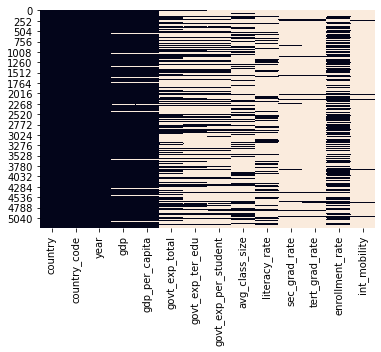

In [437]:
sns.heatmap(df_final.isnull(), cbar=False)

In [438]:
## Grouping by country and taking an average of the last 20 years
df_avg = df_final.groupby(by=['country', 'country_code']).mean()

## Removing columns with too many NaN values
df_avg.drop(columns=['year','sec_grad_rate', 'tert_grad_rate', 'int_mobility', 'literacy_rate'], inplace=True)
df_avg

gdp  \
country                                            country_code                 
Afghanistan                                        AFG           1.400166e+10   
Albania                                            ALB           1.034662e+10   
Algeria                                            DZA           1.406949e+11   
American Samoa                                     ASM           5.847647e+08   
Andorra                                            AND           3.005506e+09   
Angola                                             AGO           7.648371e+10   
Antigua and Barbuda                                ATG           1.190054e+09   
Arab World                                         ARB           1.914972e+12   
Argentina                                          ARG           3.849429e+11   
Armenia                                            ARM           8.255081e+09   
Aruba                                              ABW           2.471275e+09   
Australia                                          AUS           1.019573e+12   
Austria                                            AUT           3.621467e+11   
Azerbaijan                                         AZE           3.792553e+10   
Bahamas, The                                       BHS           1.038930e+10   
Bahrain                                            BHR           2.414514e+10   
Bangladesh                                         BGD           1.322650e+11   
Barbados                                           BRB           4.291275e+09   
Belarus                                            BLR           4.628789e+10   
Belgium                                            BEL           4.373218e+11   
Belize                                             BLZ           1.380108e+09   
Benin                                              BEN           9.289468e+09   
Bermuda                                            BMU           5.019241e+09   
Bhutan                                             BTN           1.359193e+09   
Bolivia                                            BOL           2.147109e+10   
Bosnia and Herzegovina                             BIH           1.473433e+10   
Botswana                                           BWA           1.217915e+10   
Brazil                                             BRA           1.565732e+12   
British Virgin Islands                             VGB                    NaN   
Brunei Darussalam                                  BRN           1.201097e+10   
Bulgaria                                           BGR           4.389683e+10   
Burkina Faso                                       BFA           9.597857e+09   
Burundi                                            BDI           1.922842e+09   
Cabo Verde                                         CPV           1.425864e+09   
Cambodia                                           KHM           1.234323e+10   
Cameroon                                           CMR           2.520690e+10   
Canada                                             CAN           1.404536e+12   
Caribbean small states                             CSS           5.945419e+10   
Cayman Islands                                     CYM           4.569237e+09   
Central African Republic                           CAF           1.724946e+09   
Central Europe and the Baltics                     CEB           1.157506e+12   
Chad                                               TCD           8.512564e+09   
Channel Islands                                    CHI           8.155027e+09   
Chile                                              CHL           1.912818e+11   
China                                              CHN           6.549066e+12   
Colombia                                           COL           2.398504e+11   
Comoros                                            COM           8.461809e+08   
Congo, Dem. Rep.                                   COD           2.443015e+10   
Congo, Rep.             

In [439]:
df_avg = df_avg.reset_index()

In [440]:
## Removing regions/groups of countries
countries = list(pycountry.countries)
codes = [item.alpha_3 for item in countries]
codes.append('WLD')
for code in df_avg['country_code']:
    if code not in codes:
        df_avg.drop(df_avg[df_avg['country_code']==code].index, inplace=True)
df_avg = df_avg.reset_index()
df_avg.drop(columns=['index'], axis=1, inplace=True)

df_avg

country country_code           gdp  \
0                       Afghanistan          AFG  1.400166e+10   
1                           Albania          ALB  1.034662e+10   
2                           Algeria          DZA  1.406949e+11   
3                    American Samoa          ASM  5.847647e+08   
4                           Andorra          AND  3.005506e+09   
5                            Angola          AGO  7.648371e+10   
6               Antigua and Barbuda          ATG  1.190054e+09   
7                         Argentina          ARG  3.849429e+11   
8                           Armenia          ARM  8.255081e+09   
9                             Aruba          ABW  2.471275e+09   
10                        Australia          AUS  1.019573e+12   
11                          Austria          AUT  3.621467e+11   
12                       Azerbaijan          AZE  3.792553e+10   
13                     Bahamas, The          BHS  1.038930e+10   
14                          Bahrain          BHR  2.414514e+10   
15                       Bangladesh          BGD  1.322650e+11   
16                         Barbados          BRB  4.291275e+09   
17                          Belarus          BLR  4.628789e+10   
18                          Belgium          BEL  4.373218e+11   
19                           Belize          BLZ  1.380108e+09   
20                            Benin          BEN  9.289468e+09   
21                          Bermuda          BMU  5.019241e+09   
22                           Bhutan          BTN  1.359193e+09   
23                          Bolivia          BOL  2.147109e+10   
24           Bosnia and Herzegovina          BIH  1.473433e+10   
25                         Botswana          BWA  1.217915e+10   
26                           Brazil          BRA  1.565732e+12   
27           British Virgin Islands          VGB           NaN   
28                Brunei Darussalam          BRN  1.201097e+10   
29                         Bulgaria          BGR  4.389683e+10   
30                     Burkina Faso          BFA  9.597857e+09   
31                          Burundi          BDI  1.922842e+09   
32                       Cabo Verde          CPV  1.425864e+09   
33                         Cambodia          KHM  1.234323e+10   
34                         Cameroon          CMR  2.520690e+10   
35                           Canada          CAN  1.404536e+12   
36                   Cayman Islands          CYM  4.569237e+09   
37         Central African Republic          CAF  1.724946e+09   
38                             Chad          TCD  8.512564e+09   
39                            Chile          CHL  1.912818e+11   
40                            China          CHN  6.549066e+12   
41                         Colombia          COL  2.398504e+11   
42                          Comoros          COM  8.461809e+08   
43                 Congo, Dem. Rep.          COD  2.443015e+10   
44                      Congo, Rep.          COG  8.919433e+09   
45                       Costa Rica          CRI  3.663169e+10   
46                    Cote d'Ivoire          CIV  2.877413e+10   
47                          Croatia          HRV  5.045679e+10   
48                             Cuba          CUB  6.244523e+10   
49                          Curacao          CUW  3.124317e+09   
50                           Cyprus          CYP  2.090388e+10   
51                   Czech Republic          CZE  1.751039e+11   
52                          Denmark          DNK  2.928559e+11   
53                         Djibouti          DJI  1.473613e+09   
54                         Dominica          DMA  4.561803e+08   
55               Dominican Republic          DOM  5.199924e+10   
56                          Ecuador          ECU  6.780515e+10   
57                 Egypt, Arab Rep.          EGY  1.954992e+11   
58                      El Salvador          SLV  1.887249e+10   
59                Equatorial Guinea          GNQ  1.210348e+10   
60

In [441]:
df_avg.set_index('country', inplace=True)

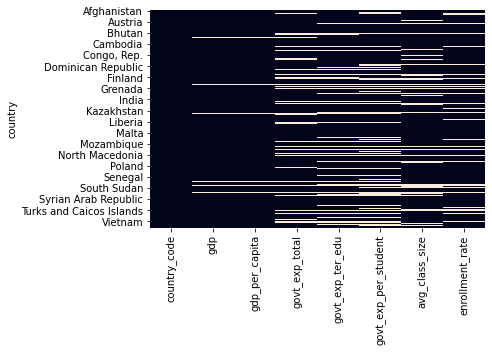

In [442]:
## Heatmap to show Null values after dropping insufficient columns and aggregation
sns.heatmap(df_avg.isnull(), cbar=False)

## Scaled after UMAP

In [443]:
reducer = umap.UMAP()

country_data = df_avg[['gdp_per_capita', 'govt_exp_total', 'govt_exp_ter_edu', 'govt_exp_per_student', 'avg_class_size', 'enrollment_rate']].dropna().values

embedding = reducer.fit_transform(country_data)

In [444]:
x = embedding
inertias = []
for k in range(1,21):
    model = KMeans(n_clusters = k, init='k-means++')
    model.fit(x)
    inertias.append(model.inertia_)

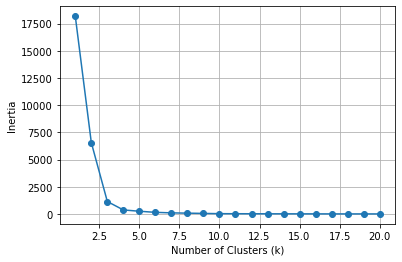

In [445]:
plt.plot(list(range(1,21)), inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [446]:
z = embedding
StandardScaler().fit_transform(z)
model = KMeans(n_clusters = 6, init='k-means++')
model.fit(z)
labels_2 = model.predict(z)

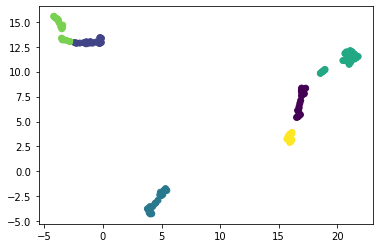

In [447]:
x = [item[0] for item in z]
y = [item[1] for item in z]
plt.scatter(x,y, c=labels_2)
plt.show()

In [448]:
df_clusters2 = df_avg.dropna()
df_clusters2['cluster_UMAPED'] = labels_2
df_clusters2

<ipython-input-448-9a37aee98a72>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clusters2['cluster_UMAPED'] = labels_2


country_code           gdp  gdp_per_capita  \
country                                                               
Afghanistan                       AFG  1.400166e+10      443.628992   
Albania                           ALB  1.034662e+10     3539.767278   
Angola                            AGO  7.648371e+10     3051.086985   
Antigua and Barbuda               ATG  1.190054e+09    13553.901264   
Argentina                         ARG  3.849429e+11     9262.576847   
Armenia                           ARM  8.255081e+09     2818.806488   
Aruba                             ABW  2.471275e+09    24519.197230   
Austria                           AUT  3.621467e+11    42905.821198   
Azerbaijan                        AZE  3.792553e+10     4091.788264   
Bahrain                           BHR  2.414514e+10    20171.292283   
Bangladesh                        BGD  1.322650e+11      873.349008   
Barbados                          BRB  4.291275e+09    15261.820324   
Belarus                           BLR  4.628789e+10     4857.450735   
Belgium                           BEL  4.373218e+11    40039.685512   
Belize                            BLZ  1.380108e+09     4264.169889   
Benin                             BEN  9.289468e+09      978.585810   
Bermuda                           BMU  5.019241e+09    78023.047081   
Bhutan                            BTN  1.359193e+09     1948.471274   
Botswana                          BWA  1.217915e+10     6076.980747   
Brazil                            BRA  1.565732e+12     7919.038761   
Brunei Darussalam                 BRN  1.201097e+10    30678.937900   
Bulgaria                          BGR  4.389683e+10     5989.010540   
Burkina Faso                      BFA  9.597857e+09      587.274799   
Burundi                           BDI  1.922842e+09      210.981961   
Cabo Verde                        CPV  1.425864e+09     2856.568528   
Cambodia                          KHM  1.234323e+10      828.059672   
Cameroon                          CMR  2.520690e+10     1202.158887   
Canada                            CAN  1.404536e+12    41010.981384   
Central African Republic          CAF  1.724946e+09      399.563927   
Chad                              TCD  8.512564e+09      681.858164   
Colombia                          COL  2.398504e+11     5229.307216   
Comoros                           COM  8.461809e+08     1202.464727   
Congo, Dem. Rep.                  COD  2.443015e+10      355.821620   
Congo, Rep.                       COG  8.919433e+09     2054.898485   
Cote d'Ivoire                     CIV  2.877413e+10     1326.896906   
Croatia                           HRV  5.045679e+10    11877.923145   
Cyprus                            CYP  2.090388e+10    25886.599535   
Czech Republic                    CZE  1.751039e+11    16754.011948   
Denmark                           DNK  2.928559e+11    52590.446200   
Djibouti                          DJI  1.473613e+09     1674.813492   
Ecuador                           ECU  6.780515e+10     4391.803831   
El Salvador                       SLV  1.887249e+10     3038.863877   
Eritrea                           ERI  1.223861e+09      424.528279   
Estonia                           EST  1.966904e+10    14770.262463   
Eswatini                          SWZ  3.556807e+09     3307.492797   
Ethiopia                          ETH  3.797324e+10      395.315307   
Finland                           FIN  2.290707e+11    42656.727271   
Gambia, The                       GMB  1.227762e+09      675.217837   
Georgia                           GEO  1.135089e+10     3005.358438   
Germany                           DEU  3.211067e+12    39185.351056   
Ghana                             GHA  3.336835e+10     1262.162968   
Greece                            GRC  2.359888e+11    21542.321368   
Grenada                           GRD  8.102914e+08     7542.829160   
Guatemala                         GTM  4.364938e+10     2983.680010   
Guinea                            GIN  6.748759e+

In [449]:
df_clusters2.to_csv(f'cluster_metric2.csv')

In [450]:
#sns.pairplot(df_clusters2, hue='cluster_UMAPED')

In [451]:
ignore_list = []

for country in df_avg.index.values.tolist():
    try:
        if df_avg.loc[country,['gdp_per_capita','govt_exp_total','govt_exp_ter_edu','govt_exp_per_student','avg_class_size','enrollment_rate']].isnull().value_counts()[False] <= 3:
            ignore_list.append(country)

    except:
        if df_avg.loc[country,['gdp_per_capita','govt_exp_total','govt_exp_ter_edu','govt_exp_per_student','avg_class_size','enrollment_rate']].isnull().value_counts()[True] > 3:
            ignore_list.append(country)

df_avg = df_avg[~df_avg.index.isin(ignore_list)]
df_avg

country_code           gdp  gdp_per_capita  \
country                                                                     
Afghanistan                             AFG  1.400166e+10      443.628992   
Albania                                 ALB  1.034662e+10     3539.767278   
Algeria                                 DZA  1.406949e+11     3805.158328   
Andorra                                 AND  3.005506e+09    38074.895868   
Angola                                  AGO  7.648371e+10     3051.086985   
Antigua and Barbuda                     ATG  1.190054e+09    13553.901264   
Argentina                               ARG  3.849429e+11     9262.576847   
Armenia                                 ARM  8.255081e+09     2818.806488   
Aruba                                   ABW  2.471275e+09    24519.197230   
Australia                               AUS  1.019573e+12    45240.894348   
Austria                                 AUT  3.621467e+11    42905.821198   
Azerbaijan                              AZE  3.792553e+10     4091.788264   
Bahrain                                 BHR  2.414514e+10    20171.292283   
Bangladesh                              BGD  1.322650e+11      873.349008   
Barbados                                BRB  4.291275e+09    15261.820324   
Belarus                                 BLR  4.628789e+10     4857.450735   
Belgium                                 BEL  4.373218e+11    40039.685512   
Belize                                  BLZ  1.380108e+09     4264.169889   
Benin                                   BEN  9.289468e+09      978.585810   
Bermuda                                 BMU  5.019241e+09    78023.047081   
Bhutan                                  BTN  1.359193e+09     1948.471274   
Bosnia and Herzegovina                  BIH  1.473433e+10     4121.669577   
Botswana                                BWA  1.217915e+10     6076.980747   
Brazil                                  BRA  1.565732e+12     7919.038761   
British Virgin Islands                  VGB           NaN             NaN   
Brunei Darussalam                       BRN  1.201097e+10    30678.937900   
Bulgaria                                BGR  4.389683e+10     5989.010540   
Burkina Faso                            BFA  9.597857e+09      587.274799   
Burundi                                 BDI  1.922842e+09      210.981961   
Cabo Verde                              CPV  1.425864e+09     2856.568528   
Cambodia                                KHM  1.234323e+10      828.059672   
Cameroon                                CMR  2.520690e+10     1202.158887   
Canada                                  CAN  1.404536e+12    41010.981384   
Central African Republic                CAF  1.724946e+09      399.563927   
Chad                                    TCD  8.512564e+09      681.858164   
Chile                                   CHL  1.912818e+11    11002.406349   
Colombia                                COL  2.398504e+11     5229.307216   
Comoros                                 COM  8.461809e+08     1202.464727   
Congo, Dem. Rep.                        COD  2.443015e+10      355.821620   
Congo, Rep.                             COG  8.919433e+09     2054.898485   
Costa Rica                              CRI  3.663169e+10     7857.499193   
Cote d'Ivoire                           CIV  2.877413e+10     1326.896906   
Croatia                                 HRV  5.045679e+10    11877.923145   
Cuba                                    CUB  6.244523e+10     5539.637054   
Curacao                                 CUW  3.124317e+09    19999.078667   
Cyprus                                  CYP  2.090388e+10    25886.599535   
Czech Republic                          CZE  1.751039e+11    16754.011948   
Denmark                                 DNK  2.928559e+11    52590.446200   
Djibouti                                DJI  1.473613e+09     1674.813492   
Dominican Republic                      DOM  5.199924e+10     5273.362282   
Ecuador                    

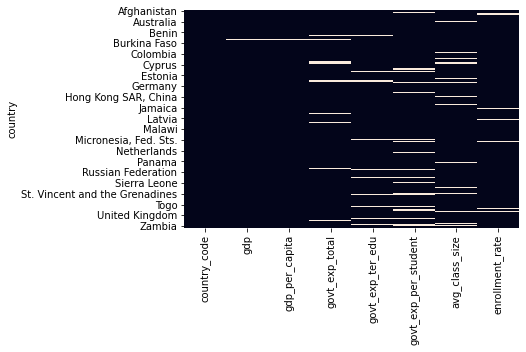

In [452]:
sns.heatmap(df_avg.isnull(), cbar=False)

In [453]:
df_avg = df_avg.join(df_clusters2.loc[:,'cluster_UMAPED'], how='left')
df_avg

country_code           gdp  gdp_per_capita  \
country                                                                     
Afghanistan                             AFG  1.400166e+10      443.628992   
Albania                                 ALB  1.034662e+10     3539.767278   
Algeria                                 DZA  1.406949e+11     3805.158328   
Andorra                                 AND  3.005506e+09    38074.895868   
Angola                                  AGO  7.648371e+10     3051.086985   
Antigua and Barbuda                     ATG  1.190054e+09    13553.901264   
Argentina                               ARG  3.849429e+11     9262.576847   
Armenia                                 ARM  8.255081e+09     2818.806488   
Aruba                                   ABW  2.471275e+09    24519.197230   
Australia                               AUS  1.019573e+12    45240.894348   
Austria                                 AUT  3.621467e+11    42905.821198   
Azerbaijan                              AZE  3.792553e+10     4091.788264   
Bahrain                                 BHR  2.414514e+10    20171.292283   
Bangladesh                              BGD  1.322650e+11      873.349008   
Barbados                                BRB  4.291275e+09    15261.820324   
Belarus                                 BLR  4.628789e+10     4857.450735   
Belgium                                 BEL  4.373218e+11    40039.685512   
Belize                                  BLZ  1.380108e+09     4264.169889   
Benin                                   BEN  9.289468e+09      978.585810   
Bermuda                                 BMU  5.019241e+09    78023.047081   
Bhutan                                  BTN  1.359193e+09     1948.471274   
Bosnia and Herzegovina                  BIH  1.473433e+10     4121.669577   
Botswana                                BWA  1.217915e+10     6076.980747   
Brazil                                  BRA  1.565732e+12     7919.038761   
British Virgin Islands                  VGB           NaN             NaN   
Brunei Darussalam                       BRN  1.201097e+10    30678.937900   
Bulgaria                                BGR  4.389683e+10     5989.010540   
Burkina Faso                            BFA  9.597857e+09      587.274799   
Burundi                                 BDI  1.922842e+09      210.981961   
Cabo Verde                              CPV  1.425864e+09     2856.568528   
Cambodia                                KHM  1.234323e+10      828.059672   
Cameroon                                CMR  2.520690e+10     1202.158887   
Canada                                  CAN  1.404536e+12    41010.981384   
Central African Republic                CAF  1.724946e+09      399.563927   
Chad                                    TCD  8.512564e+09      681.858164   
Chile                                   CHL  1.912818e+11    11002.406349   
Colombia                                COL  2.398504e+11     5229.307216   
Comoros                                 COM  8.461809e+08     1202.464727   
Congo, Dem. Rep.                        COD  2.443015e+10      355.821620   
Congo, Rep.                             COG  8.919433e+09     2054.898485   
Costa Rica                              CRI  3.663169e+10     7857.499193   
Cote d'Ivoire                           CIV  2.877413e+10     1326.896906   
Croatia                                 HRV  5.045679e+10    11877.923145   
Cuba                                    CUB  6.244523e+10     5539.637054   
Curacao                                 CUW  3.124317e+09    19999.078667   
Cyprus                                  CYP  2.090388e+10    25886.599535   
Czech Republic                          CZE  1.751039e+11    16754.011948   
Denmark                                 DNK  2.928559e+11    52590.446200   
Djibouti                                DJI  1.473613e+09     1674.813492   
Dominican Republic                      DOM  5.199924e+10     5273.362282   
Ecuador                    

In [454]:
# UMAPED cluster centroids
df_cluster_centroid = df_clusters2.groupby(by='cluster_UMAPED').mean()
df_cluster_centroid

gdp  gdp_per_capita  govt_exp_total  \
cluster_UMAPED                                                 
0               1.258759e+11     1773.978384       17.011597   
1               1.243958e+12    49674.097926       13.222074   
2               2.354952e+11     6306.642771       15.182160   
3               2.124813e+10      631.445297       15.374911   
4               1.208175e+11    16432.272787       12.124537   
5               1.713920e+10     3117.542143       15.684247   

                govt_exp_ter_edu  govt_exp_per_student  avg_class_size  \
cluster_UMAPED                                                           
0                      17.257064             80.272174       22.361516   
1                      25.590954             35.511793       12.448987   
2                      18.698489             35.765074       16.093882   
3                      18.783690            225.141934       22.459609   
4                      20.123362             29.467548       13.832997   
5                      16.111484             66.279807       15.020171   

                enrollment_rate  
cluster_UMAPED                   
0                     18.502397  
1                     61.839712  
2                     40.410509  
3                      7.765730  
4                     52.658318  
5                     21.928448

In [455]:
# country = 'France'    
def assign_cluster(country):
    
    dist = {cluster:{col:None for col in df_cluster_centroid.columns} for cluster in df_cluster_centroid.index.to_list()}

    for cluster in df_cluster_centroid.index.to_list():
        for col in df_cluster_centroid.columns:
            if df_avg.loc[country].isnull()[col]:
                pass
            else:
                dist[cluster][col]= (df_avg.loc[country,col]-df_cluster_centroid.loc[cluster,col])**2


        cluster_vals = list(dist[cluster].values())
        while None in cluster_vals:
            cluster_vals.remove(None)
        dist[cluster]['dist_to_cluster'] = (sum(cluster_vals))**0.5


    temp = dist[0]['dist_to_cluster']
    for cluster in dist.keys():
        if dist[cluster]['dist_to_cluster'] >= temp:
            pass
        else:
            temp = dist[cluster]['dist_to_cluster']
            
    for cluster in dist.keys():
        if list(dist.values())[cluster]['dist_to_cluster'] == temp:
            df_avg.loc[country,'cluster_UMAPED'] = cluster
            return f'{country} #assigned# to cluster {cluster}'
        else:
            outpt = f'{country} NOT ASSIGNED  {cluster}'
    return outpt

In [456]:
for country in df_avg.index.to_list():
    for col in df_avg.columns[:-1]:
        if df_avg.loc[country].isnull()[col]:
            assign_cluster(country)       

In [457]:
df_avg.loc[:,'cluster_UMAPED'].isnull().any()

False

# Ranking the clusters

In [458]:
df_cluster_centroid['avg_class_size'] = 1/(df_cluster_centroid['avg_class_size'])
df_cluster_centroid

gdp  gdp_per_capita  govt_exp_total  \
cluster_UMAPED                                                 
0               1.258759e+11     1773.978384       17.011597   
1               1.243958e+12    49674.097926       13.222074   
2               2.354952e+11     6306.642771       15.182160   
3               2.124813e+10      631.445297       15.374911   
4               1.208175e+11    16432.272787       12.124537   
5               1.713920e+10     3117.542143       15.684247   

                govt_exp_ter_edu  govt_exp_per_student  avg_class_size  \
cluster_UMAPED                                                           
0                      17.257064             80.272174        0.044720   
1                      25.590954             35.511793        0.080328   
2                      18.698489             35.765074        0.062135   
3                      18.783690            225.141934        0.044524   
4                      20.123362             29.467548        0.072291   
5                      16.111484             66.279807        0.066577   

                enrollment_rate  
cluster_UMAPED                   
0                     18.502397  
1                     61.839712  
2                     40.410509  
3                      7.765730  
4                     52.658318  
5                     21.928448

In [459]:
def euclidean_dist(dataframe):
    lst = []
    for i in range(len(dataframe)):
        lst.append((sum(list(map(lambda x: x**2, df_cluster_centroid.loc[i]))))**0.5)
    dataframe['euclidean_dist'] = lst
    return dataframe
        

In [460]:
df_rank_clusters = euclidean_dist(df_cluster_centroid)

In [461]:
df_rank_clusters['rank'] = df_rank_clusters['euclidean_dist'].rank(ascending=False)
df_rank_clusters

gdp  gdp_per_capita  govt_exp_total  \
cluster_UMAPED                                                 
0               1.258759e+11     1773.978384       17.011597   
1               1.243958e+12    49674.097926       13.222074   
2               2.354952e+11     6306.642771       15.182160   
3               2.124813e+10      631.445297       15.374911   
4               1.208175e+11    16432.272787       12.124537   
5               1.713920e+10     3117.542143       15.684247   

                govt_exp_ter_edu  govt_exp_per_student  avg_class_size  \
cluster_UMAPED                                                           
0                      17.257064             80.272174        0.044720   
1                      25.590954             35.511793        0.080328   
2                      18.698489             35.765074        0.062135   
3                      18.783690            225.141934        0.044524   
4                      20.123362             29.467548        0.072291   
5                      16.111484             66.279807        0.066577   

                enrollment_rate  euclidean_dist  rank  
cluster_UMAPED                                         
0                     18.502397    1.258759e+11   3.0  
1                     61.839712    1.243958e+12   1.0  
2                     40.410509    2.354952e+11   2.0  
3                      7.765730    2.124813e+10   5.0  
4                     52.658318    1.208175e+11   4.0  
5                     21.928448    1.713920e+10   6.0

In [466]:
for country in df_avg.index.to_list():
    cluster = df_avg.loc[country,'cluster_UMAPED']
    df_avg.loc[country,'rank'] = df_rank_clusters.loc[cluster, 'rank']
df_avg

country_code           gdp  gdp_per_capita  \
country                                                                     
Afghanistan                             AFG  1.400166e+10      443.628992   
Albania                                 ALB  1.034662e+10     3539.767278   
Algeria                                 DZA  1.406949e+11     3805.158328   
Andorra                                 AND  3.005506e+09    38074.895868   
Angola                                  AGO  7.648371e+10     3051.086985   
Antigua and Barbuda                     ATG  1.190054e+09    13553.901264   
Argentina                               ARG  3.849429e+11     9262.576847   
Armenia                                 ARM  8.255081e+09     2818.806488   
Aruba                                   ABW  2.471275e+09    24519.197230   
Australia                               AUS  1.019573e+12    45240.894348   
Austria                                 AUT  3.621467e+11    42905.821198   
Azerbaijan                              AZE  3.792553e+10     4091.788264   
Bahrain                                 BHR  2.414514e+10    20171.292283   
Bangladesh                              BGD  1.322650e+11      873.349008   
Barbados                                BRB  4.291275e+09    15261.820324   
Belarus                                 BLR  4.628789e+10     4857.450735   
Belgium                                 BEL  4.373218e+11    40039.685512   
Belize                                  BLZ  1.380108e+09     4264.169889   
Benin                                   BEN  9.289468e+09      978.585810   
Bermuda                                 BMU  5.019241e+09    78023.047081   
Bhutan                                  BTN  1.359193e+09     1948.471274   
Bosnia and Herzegovina                  BIH  1.473433e+10     4121.669577   
Botswana                                BWA  1.217915e+10     6076.980747   
Brazil                                  BRA  1.565732e+12     7919.038761   
British Virgin Islands                  VGB           NaN             NaN   
Brunei Darussalam                       BRN  1.201097e+10    30678.937900   
Bulgaria                                BGR  4.389683e+10     5989.010540   
Burkina Faso                            BFA  9.597857e+09      587.274799   
Burundi                                 BDI  1.922842e+09      210.981961   
Cabo Verde                              CPV  1.425864e+09     2856.568528   
Cambodia                                KHM  1.234323e+10      828.059672   
Cameroon                                CMR  2.520690e+10     1202.158887   
Canada                                  CAN  1.404536e+12    41010.981384   
Central African Republic                CAF  1.724946e+09      399.563927   
Chad                                    TCD  8.512564e+09      681.858164   
Chile                                   CHL  1.912818e+11    11002.406349   
Colombia                                COL  2.398504e+11     5229.307216   
Comoros                                 COM  8.461809e+08     1202.464727   
Congo, Dem. Rep.                        COD  2.443015e+10      355.821620   
Congo, Rep.                             COG  8.919433e+09     2054.898485   
Costa Rica                              CRI  3.663169e+10     7857.499193   
Cote d'Ivoire                           CIV  2.877413e+10     1326.896906   
Croatia                                 HRV  5.045679e+10    11877.923145   
Cuba                                    CUB  6.244523e+10     5539.637054   
Curacao                                 CUW  3.124317e+09    19999.078667   
Cyprus                                  CYP  2.090388e+10    25886.599535   
Czech Republic                          CZE  1.751039e+11    16754.011948   
Denmark                                 DNK  2.928559e+11    52590.446200   
Djibouti                                DJI  1.473613e+09     1674.813492   
Dominican Republic                      DOM  5.199924e+10     5273.362282   
Ecuador                    

In [462]:
#df_output = df_rank_clusters.merge(df_avg, left_on=df_rank_clusters.index, right_on='cluster_UMAPED', how='inner')

In [472]:
df_output = df_avg[['country_code',
      'rank',
      'gdp_per_capita',
      'govt_exp_total',
      'govt_exp_ter_edu',
      'govt_exp_per_student',
      'avg_class_size',
      'enrollment_rate' 
     ]]

display(df_output)

country_code  rank  gdp_per_capita  \
country                                                             
Afghanistan                             AFG   5.0      443.628992   
Albania                                 ALB   6.0     3539.767278   
Algeria                                 DZA   3.0     3805.158328   
Andorra                                 AND   6.0    38074.895868   
Angola                                  AGO   6.0     3051.086985   
Antigua and Barbuda                     ATG   4.0    13553.901264   
Argentina                               ARG   2.0     9262.576847   
Armenia                                 ARM   6.0     2818.806488   
Aruba                                   ABW   4.0    24519.197230   
Australia                               AUS   1.0    45240.894348   
Austria                                 AUT   1.0    42905.821198   
Azerbaijan                              AZE   2.0     4091.788264   
Bahrain                                 BHR   4.0    20171.292283   
Bangladesh                              BGD   5.0      873.349008   
Barbados                                BRB   4.0    15261.820324   
Belarus                                 BLR   2.0     4857.450735   
Belgium                                 BEL   1.0    40039.685512   
Belize                                  BLZ   2.0     4264.169889   
Benin                                   BEN   5.0      978.585810   
Bermuda                                 BMU   1.0    78023.047081   
Bhutan                                  BTN   3.0     1948.471274   
Bosnia and Herzegovina                  BIH   6.0     4121.669577   
Botswana                                BWA   2.0     6076.980747   
Brazil                                  BRA   2.0     7919.038761   
British Virgin Islands                  VGB   4.0             NaN   
Brunei Darussalam                       BRN   1.0    30678.937900   
Bulgaria                                BGR   2.0     5989.010540   
Burkina Faso                            BFA   5.0      587.274799   
Burundi                                 BDI   5.0      210.981961   
Cabo Verde                              CPV   6.0     2856.568528   
Cambodia                                KHM   5.0      828.059672   
Cameroon                                CMR   3.0     1202.158887   
Canada                                  CAN   1.0    41010.981384   
Central African Republic                CAF   5.0      399.563927   
Chad                                    TCD   5.0      681.858164   
Chile                                   CHL   2.0    11002.406349   
Colombia                                COL   2.0     5229.307216   
Comoros                                 COM   3.0     1202.464727   
Congo, Dem. Rep.                        COD   5.0      355.821620   
Congo, Rep.                             COG   3.0     2054.898485   
Costa Rica                              CRI   5.0     7857.499193   
Cote d'Ivoire                           CIV   3.0     1326.896906   
Croatia                                 HRV   4.0    11877.923145   
Cuba                                    CUB   5.0     5539.637054   
Curacao                                 CUW   6.0    19999.078667   
Cyprus                                  CYP   4.0    25886.599535   
Czech Republic                          CZE   4.0    16754.011948   
Denmark                                 DNK   1.0    52590.446200   
Djibouti                                DJI   3.0     1674.813492   
Dominican Republic                      DOM   5.0     5273.362282   
Ecuador                                 ECU   2.0     4391.803831   
Egypt, Arab Rep.                        EGY   2.0     2267.320385   
El Salvador                             SLV   6.0     3038.863877   
Eritrea                                 ERI   5.0      424.528279   
Estonia                                 EST   4.0    14770.262463   
Eswatini                                SWZ   6.0     3307.492797   
Ethiopia                     

In [468]:
#df_output.drop(columns = ['gdp_per_capita_x','govt_exp_total_x','govt_exp_ter_edu_x','govt_exp_per_student_x','avg_class_size_x','enrollment_rate_x','cluster_UMAPED'], inplace=True)
# df_output.rename(columns = {'gdp_per_capita_y':'gdp_per_capita','govt_exp_total_y':'govt_exp_total','govt_exp_ter_edu_y':'govt_exp_ter_edu','govt_exp_per_student_y':'govt_exp_per_student','avg_class_size_y':'avg_class_size','enrollment_rate_y':'enrollment_rate'}, inplace=True)
# df_output = df_output[['country_code',
#       'rank',
#       'euclidean_dist',
#       'gdp_per_capita',
#       'govt_exp_total',
#       'govt_exp_ter_edu',
#       'govt_exp_per_student',
#       'avg_class_size',
#       'enrollment_rate' 
#      ]]
# display(df_output)

country_code  rank  euclidean_dist  gdp_per_capita  govt_exp_total  \
0            DZA   3.0    1.258759e+11     3805.158328       11.428350   
1            BTN   3.0    1.258759e+11     1948.471274       18.086491   
2            CMR   3.0    1.258759e+11     1202.158887       16.807907   
3            COM   3.0    1.258759e+11     1202.464727       19.020447   
4            COG   3.0    1.258759e+11     2054.898485       11.690934   
5            CIV   3.0    1.258759e+11     1326.896906       21.568148   
6            DJI   3.0    1.258759e+11     1674.813492       20.018303   
7            GHA   3.0    1.258759e+11     1262.162968       23.138665   
8            HND   3.0    1.258759e+11     1805.216837       23.279153   
9            IND   3.0    1.258759e+11     1195.183546       12.787243   
10           IDN   3.0    1.258759e+11     2506.131429       16.286943   
11           LAO   3.0    1.258759e+11     1262.380288       11.915213   
12           MRT   3.0    1.258759e+11     1341.939156       11.604722   
13           MDA   3.0    1.258759e+11     2189.531855       18.765763   
14           MNG   3.0    1.258759e+11     2489.322015       14.487632   
15           MAR   3.0    1.258759e+11     2528.358932       17.382965   
16           PHL   3.0    1.258759e+11     2136.814080       13.733373   
17           STP   3.0    1.258759e+11     1237.443134       14.414152   
18           SEN   3.0    1.258759e+11     1157.346003       20.528106   
19           LKA   3.0    1.258759e+11     2479.095682       10.913422   
20           SYR   3.0    1.258759e+11     1464.146607       18.461022   
21           UKR   3.0    1.258759e+11     2478.264856       13.474140   
22           VUT   3.0    1.258759e+11     2487.603384       25.952896   
23           VNM   3.0    1.258759e+11     1370.858276       16.949080   
24           AUS   1.0    1.243958e+12    45240.894348       13.533425   
25           AUT   1.0    1.243958e+12    42905.821198       10.620012   
26           BEL   1.0    1.243958e+12    40039.685512       11.961102   
27           BMU   1.0    1.243958e+12    78023.047081       10.718654   
28           BRN   1.0    1.243958e+12    30678.937900        9.092997   
29           CAN   1.0    1.243958e+12    41010.981384       12.322008   
30           DNK   1.0    1.243958e+12    52590.446200       15.003391   
31           FIN   1.0    1.243958e+12    42656.727271       12.343917   
32           FRA   1.0    1.243958e+12    36871.352798             NaN   
33           DEU   1.0    1.243958e+12    39185.351056       10.530650   
34           ISL   1.0    1.243958e+12    51276.560925       16.525486   
35           IRL   1.0    1.243958e+12    53226.098302       12.885278   
36           ITA   1.0    1.243958e+12    32239.985973        8.837994   
37           JPN   1.0    1.243958e+12    38810.421118        8.927493   
38           KOR   1.0    1.243958e+12    22935.085134             NaN   
39           KWT   1.0    1.243958e+12    35259.620220       15.090054   
40           LUX   1.0    1.243958e+12    94455.710480        9.392627   
41           MAC   1.0    1.243958e+12    52052.624888       13.320024   
42           NLD   1.0    1.243958e+12    45627.327071       11.825871   
43           NZL   1.0    1.243958e+12    32220.180550       16.145693   
44           NOR   1.0    1.243958e+12    74886.730374       16.094765   
45           SMR   1.0    1.243958e+12    53743.155856       11.508420   
46           SGP   1.0    1.243958e+12    43858.165652       24.173372   
47           SWE   1.0    1.243958e+12    48502.841234       13.716639   
48           CHE   1.0    1.243958e+12    68175.371588       15.609215   
49           GBR   1.0    1.243958e+12    40520.428665       13.076260   
50           USA   1.0    1.243958e+12    49368.452906       13.313275   
51           WLD   1.0    1.243958e+12     8898.346591       14.227017   
52           ARG   2.0    2.354952e+11     9262.576847       15.014792   
53      

In [473]:
df_output.to_csv('output.csv')

In [465]:
#df_output['country_code'=='DZA']